[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NorisTalaban/Satellite_Object_Detection_dl/blob/main/Satellite_Object_Detection.ipynb)

In [ ]:
!pip install ultralytics
!pip install -q gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.3 MB/s eta 0:00:00


In [ ]:
import os
import random
import zipfile
from pathlib import Path
import yaml
import cv2
from PIL import ImageChops
import matplotlib.pyplot as plt
import torch
from ultralytics import YOLO
from tqdm import tqdm
import gdown
import pandas as pd
import numpy as np
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:

file_id = "1vE5gLeLITUw6oYm6DNCJX4HJh_VbiPVt"
file_path = "/content/xview.zip"
url = f"https://drive.google.com/uc?id={file_id}"


if not os.path.exists(file_path):
    print("Downloading file...")
    gdown.download(url, file_path, quiet=False)
else:
    print("File found:", file_path)


extract_path = "/content/xview"

if not os.path.exists(extract_path):
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")  # Extract to /content/
    print("File extracted to:", extract_path)
else:
    print("Dataset already extracted.")


print(os.listdir("/content/"))


Downloading...
From (original): https://drive.google.com/uc?id=1vE5gLeLITUw6oYm6DNCJX4HJh_VbiPVt
From (redirected): https://drive.google.com/uc?id=1vE5gLeLITUw6oYm6DNCJX4HJh_VbiPVt&confirm=t&uuid=3ccfa721-e42b-46c2-a8ff-09228073c5fc
To: /content/xview.zip
100%|██████████| 2.43G/2.43G [00:26<00:00, 93.0MB/s]


File extracted to: /content/xview
['.config', 'xview', 'xview.zip', 'sample_data']


In [ ]:
folders = [
    "/content/xview",
    "/content/xview/train",
    "/content/xview/val",
    "/content/xview/test"
]

for folder in folders:
    print(f"\nContents of {folder}:")
    if os.path.exists(folder):
        print(os.listdir(folder))
    else:
        print("Folder not found:", folder)
    print("Dataset already extracted.")

# Verify /content/ directory
print(os.listdir("/content/"))




Contents of /content/xview:
['train', 'test', 'val']
Dataset already extracted.

Contents of /content/xview/train:
['img_847_0_1920.jpg', 'img_106_0_0.txt', 'img_1914_3200_1280.jpg', 'img_2373_2560_1920.txt', 'img_1284_1920_1920.jpg', 'img_238_1280_640.jpg', 'img_1677_0_1920.jpg', 'img_883_1920_640.txt', 'img_1887_640_1280.jpg', 'img_1739_640_0.jpg', 'img_1964_640_3200.txt', 'img_2511_640_1920.jpg', 'img_415_0_1280.txt', 'img_381_1920_0.txt', 'img_1265_1920_1920.jpg', 'img_1125_640_3200.jpg', 'img_880_0_3200.txt', 'img_1430_0_1920.jpg', 'img_1046_640_0.txt', 'img_110_640_2560.jpg', 'img_41_0_2560.jpg', 'img_1892_0_640.jpg', 'img_1913_640_1280.txt', 'img_2524_640_640.jpg', 'img_488_2560_2560.jpg', 'img_1309_1280_640.jpg', 'img_88_0_640.txt', 'img_2541_3200_1920.jpg', 'img_1815_0_3200.jpg', 'img_1346_0_2560.txt', 'img_1467_2560_2560.txt', 'img_2308_1280_0.txt', 'img_1818_1280_0.txt', 'img_1908_3200_0.txt', 'img_8_640_1920.txt', 'img_1114_2560_2560.txt', 'img_2359_2560_2560.txt', 'img_11

In [ ]:
yaml_temp_path = "/content/xview_temp.yaml"
yaml_dict = {
    "path": "/content/xview",
    "train": "train",
    "val": "val",
    "test": "test",
    "nc": 60,
    "names": {
        0: "Fixed-wing Aircraft", 1: "Small Aircraft", 2: "Passenger/Cargo Plane",
        3: "Helicopter", 4: "Passenger Vehicle", 5: "Small Car",
        6: "Bus", 7: "Pickup Truck", 8: "Utility Truck",
        9: "Truck", 10: "Cargo Truck", 11: "Truck Tractor w/ Box Trailer",
        12: "Truck Tractor", 13: "Trailer", 14: "Truck Tractor w/ Flatbed Trailer",
        15: "Truck Tractor w/ Liquid Tank", 16: "Crane Truck", 17: "Railway Vehicle",
        18: "Passenger Car", 19: "Cargo/Container Car", 20: "Flat Car",
        21: "Tank car", 22: "Locomotive", 23: "Maritime Vessel",
        24: "Motorboat", 25: "Sailboat", 26: "Tugboat",
        27: "Barge", 28: "Fishing Vessel", 29: "Ferry",
        30: "Yacht", 31: "Container Ship", 32: "Oil Tanker",
        33: "Engineering Vehicle", 34: "Tower crane", 35: "Container Crane",
        36: "Reach Stacker", 37: "Straddle Carrier", 38: "Mobile Crane",
        39: "Dump Truck", 40: "Haul Truck", 41: "Scraper/Tractor",
        42: "Front loader/Bulldozer", 43: "Excavator", 44: "Cement Mixer",
        45: "Ground Grader", 46: "Hut/Tent", 47: "Shed",
        48: "Building", 49: "Aircraft Hangar", 50: "Damaged Building",
        51: "Facility", 52: "Construction Site", 53: "Vehicle Lot",
        54: "Helipad", 55: "Storage Tank", 56: "Shipping container lot",
        57: "Shipping Container", 58: "Pylon", 59: "Tower"
    }
}

# Save temporary YAML configuration for YOLO
with open(yaml_temp_path, "w") as f:
    yaml.dump(yaml_dict, f, sort_keys=False)

print("Temporary YAML created:", yaml_temp_path)



Temporary YAML created: /content/xview_temp.yaml


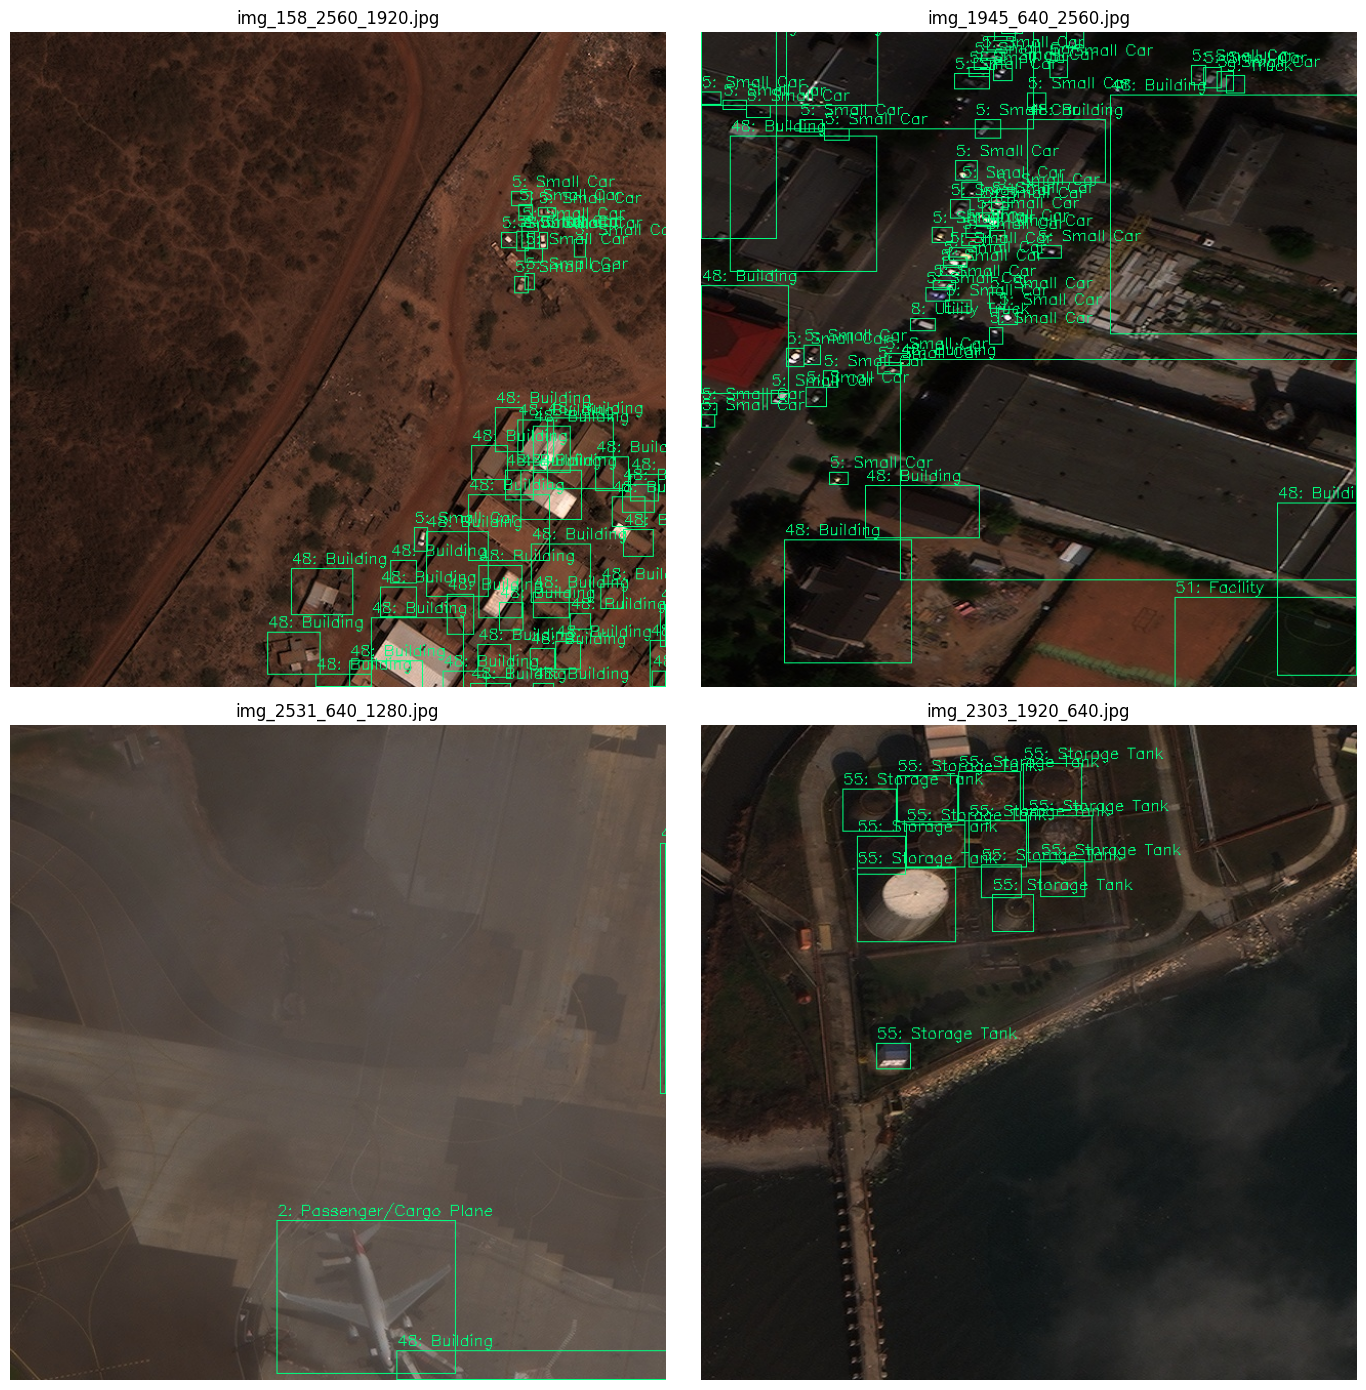

In [ ]:
# check bounding boxes

image_dir = "/content/xview/train"

all_images = [f for f in os.listdir(image_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
selected_images = random.sample(all_images, 4)

plt.figure(figsize=(14, 14))

# Use the names from your existing YAML dict
class_names = yaml_dict["names"]

# Light color for boxes
box_color = (0, 255, 128)

for i, img_name in enumerate(selected_images, 1):
    img_path = f"{image_dir}/{img_name}"
    label_path = f"{image_dir}/{img_name.rsplit('.', 1)[0]}.txt"

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    if os.path.exists(label_path):
        with open(label_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            cls, cx, cy, bw, bh = map(float, line.split())
            x1 = int((cx - bw / 2) * w)
            y1 = int((cy - bh / 2) * h)
            x2 = int((cx + bw / 2) * w)
            y2 = int((cy + bh / 2) * h)

            # Draw very light bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), box_color, 1)

            # Draw class number + class name
            cls_name = class_names.get(int(cls), str(int(cls)))
            label_text = f"{int(cls)}: {cls_name}"
            cv2.putText(img, label_text, (x1, max(0, y1 - 5)),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, box_color, 1)

    plt.subplot(2, 2, i)
    plt.imshow(img)
    plt.title(img_name)
    plt.axis("off")

plt.tight_layout()
plt.show()



In [ ]:
model = YOLO("yolov8n.pt")

model.train(
    data="/content/xview_temp.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    patience=8,
    mosaic=1.0,
    flipud=0.5,
    fliplr=0.5,
    project="/content/training",
    name="run",
    exist_ok=True
)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/xview_temp.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=8, perspective=0.0, plots=True, pose=12.0, pret

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b9916420d70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0

In [ ]:
files.download("/content/training/run/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
csv_path = "/content/training/run/results.csv"
Dataresults = pd.read_csv(csv_path)
first_row = Dataresults.iloc[0]

for col in Dataresults.columns:
    print(f"- {col}: {first_row[col]}")


- epoch: 1.0
- time: 358.928
- train/box_loss: 2.30504
- train/cls_loss: 3.21723
- train/dfl_loss: 1.45375
- metrics/precision(B): 0.37985
- metrics/recall(B): 0.01354
- metrics/mAP50(B): 0.01387
- metrics/mAP50-95(B): 0.00636
- val/box_loss: 2.12161
- val/cls_loss: 2.29248
- val/dfl_loss: 1.38165
- lr/pg0: 5.1952e-05
- lr/pg1: 5.1952e-05
- lr/pg2: 5.1952e-05


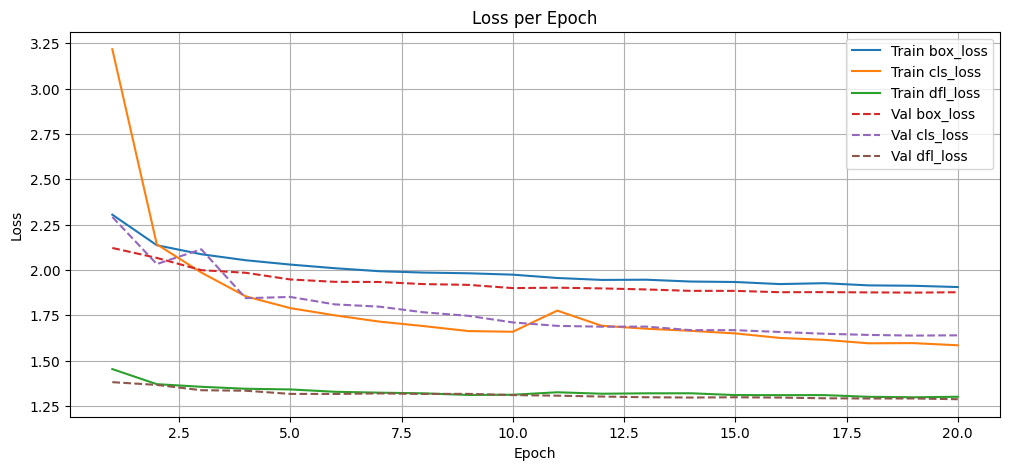

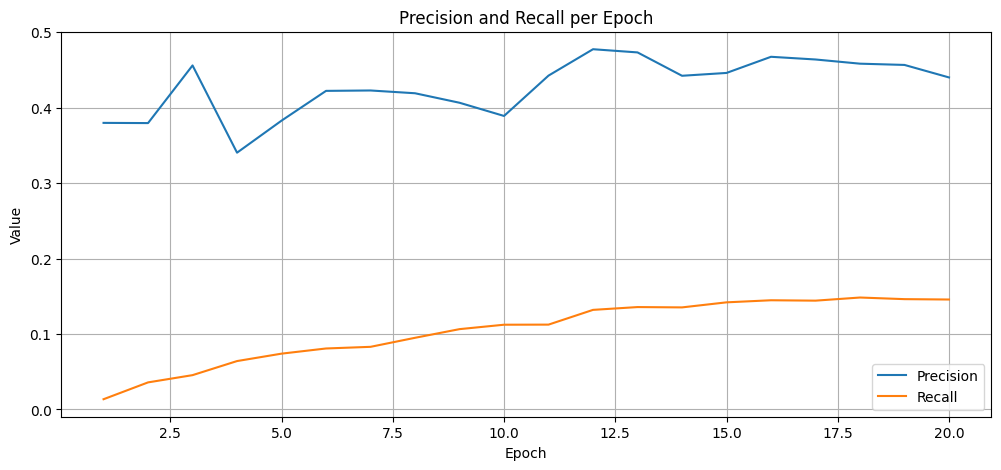

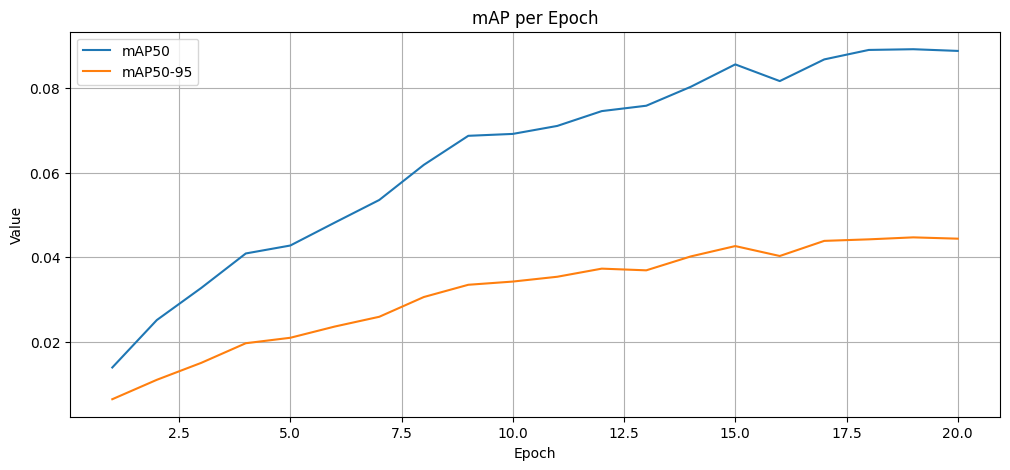

In [ ]:
# Main columns
loss_columns_train = ['train/box_loss', 'train/cls_loss', 'train/dfl_loss']
loss_columns_val = ['val/box_loss', 'val/cls_loss', 'val/dfl_loss']
metrics_columns = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

epochs = Dataresults['epoch']

#Plot Loss
plt.figure(figsize=(12,5))
for col in loss_columns_train:
    plt.plot(epochs, Dataresults[col], label=f"Train {col.split('/')[1]}")
for col in loss_columns_val:
    plt.plot(epochs, Dataresults[col], '--', label=f"Val {col.split('/')[1]}")
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

#Precision and Recall
plt.figure(figsize=(12,5))  # match the size used for Loss plot
plt.plot(epochs, Dataresults['metrics/precision(B)'], label='Precision')
plt.plot(epochs, Dataresults['metrics/recall(B)'], label='Recall')
plt.title("Precision and Recall per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

#Plot mAP
plt.figure(figsize=(12,5))
plt.plot(epochs, Dataresults['metrics/mAP50(B)'], label='mAP50')
plt.plot(epochs, Dataresults['metrics/mAP50-95(B)'], label='mAP50-95')
plt.title("mAP per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
# Load the trained model
model_val = YOLO("/content/training/run/weights/best.pt")
results_val = model_val.val(data="/content/xview_temp.yaml")
report_data = []


for cls_result in results_val.summary():
    report_data.append({
        "Class": cls_result['Class'],
        "Images": cls_result['Images'],
        "Instances": cls_result['Instances'],
        "Precision": cls_result['Box-P'],
        "Recall": cls_result['Box-R'],
        "F1": cls_result['Box-F1'],
        "mAP50": cls_result['mAP50'],
        "mAP50-95": cls_result['mAP50-95']
    })


df_report = pd.DataFrame(report_data)
df_report = df_report.sort_values(by="mAP50", ascending=False)
print(df_report)
df_report.to_csv("/content/class_report.csv", index=False)



Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,017,348 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2548.2±772.2 MB/s, size: 115.9 KB)
val: Scanning /content/xview/val.cache... 4945 images, 2300 backgrounds, 16 corrupt: 100% ━━━━━━━━━━━━ 4961/4961 7.3Mit/s 0.0s
val: /content/xview/val/img_1135_3200_1280.jpg: ignoring corrupt image/label: image size (4, 4) <10 pixels
val: /content/xview/val/img_1135_3200_1920.jpg: ignoring corrupt image/label: image size (4, 4) <10 pixels
val: /content/xview/val/img_1136_3200_0.jpg: ignoring corrupt image/label: image size (4, 4) <10 pixels
val: /content/xview/val/img_1136_3200_1280.jpg: ignoring corrupt image/label: image size (4, 4) <10 pixels
val: /content/xview/val/img_1139_3200_3200.jpg: ignoring corrupt image/label: image size (5, 5) <10 pixels
val: /content/xview/val/img_1140_3200_3200.jpg: ignoring corrupt image/label: image size (4, 

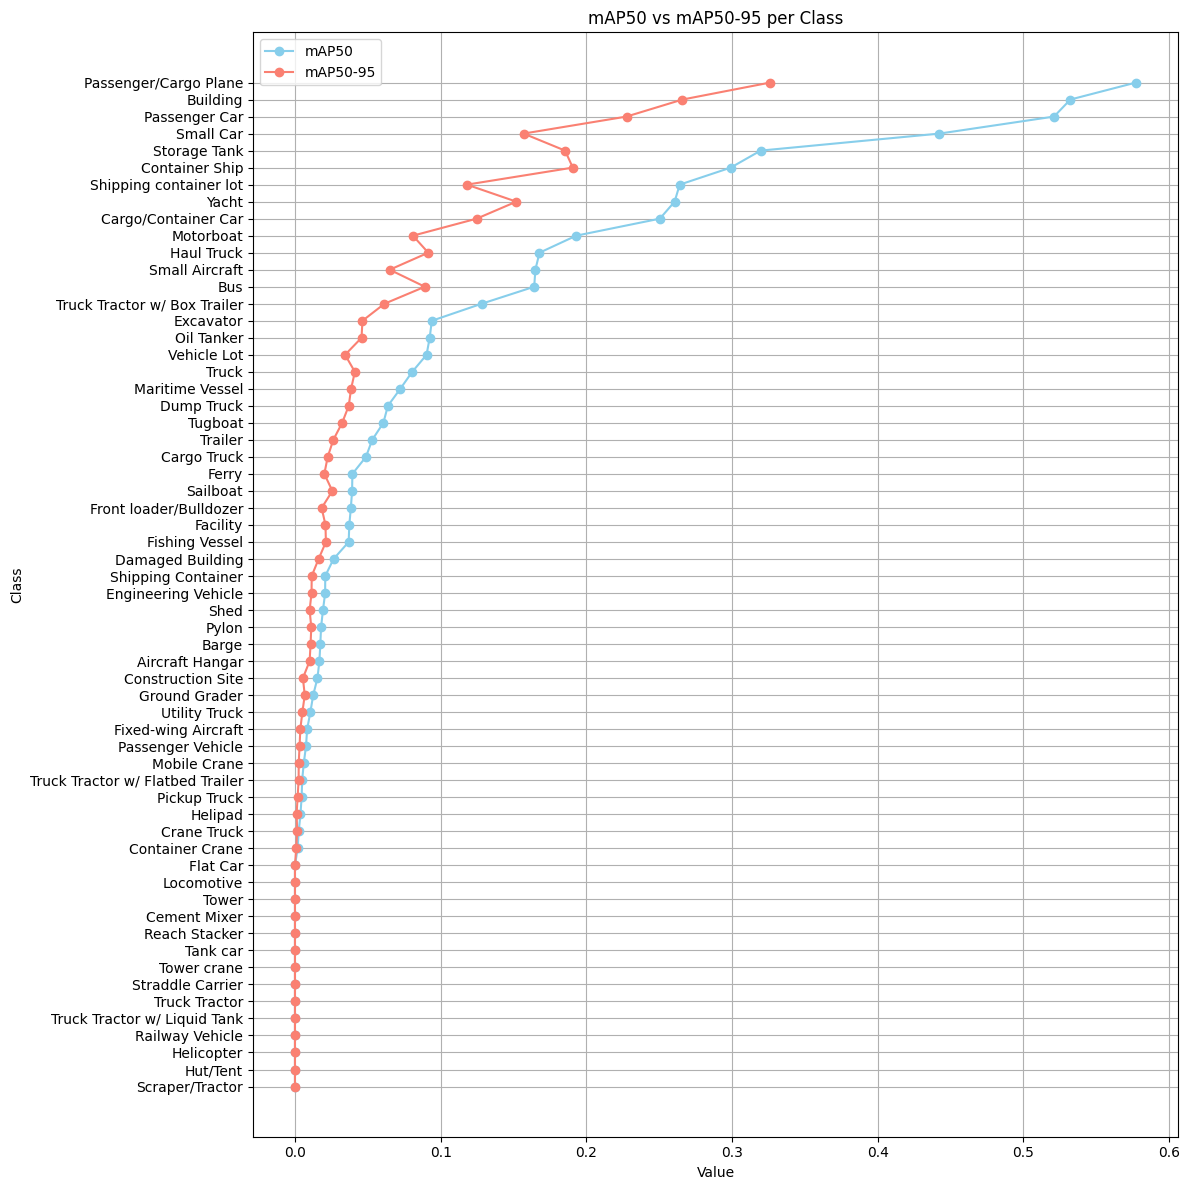

In [ ]:
# Reload class report CSV
class_report_df = pd.read_csv("/content/class_report.csv")

# Sort classes by mAP50
sorted_report = class_report_df.sort_values(by="mAP50", ascending=True)
y_pos = np.arange(len(sorted_report))

plt.figure(figsize=(12,12))
plt.plot(sorted_report["mAP50"], y_pos, marker='o', label="mAP50", color='skyblue')
plt.plot(sorted_report["mAP50-95"], y_pos, marker='o', label="mAP50-95", color='salmon')
plt.yticks(y_pos, sorted_report["Class"])
plt.xlabel("Value")
plt.ylabel("Class")
plt.title("mAP50 vs mAP50-95 per Class")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# Predict on the validation set using streaming to save RAM
conf_data = []

for r in model_val.predict(source="/content/xview/val", imgsz=640, conf=0.0, stream=True):
    for conf, cls in zip(r.boxes.conf, r.boxes.cls):
        conf_data.append({"class": int(cls), "confidence": float(conf)})

conf_df = pd.DataFrame(conf_data)

# Compute average confidence per class
avg_conf_df = conf_df.groupby("class")["confidence"].mean().reset_index()
avg_conf_df["Class"] = avg_conf_df["class"].map(lambda x: class_report_df.loc[class_report_df.index==x, "Class"].values[0])

sorted_conf = avg_conf_df.sort_values(by="confidence", ascending=True)
y_pos = np.arange(len(sorted_conf))



image 1/4961 /content/xview/val/img_100_0_1920.jpg: 640x640 12 Small Cars, 247 Buildings, 41 Construction Sites, 10.5ms
image 2/4961 /content/xview/val/img_100_1920_0.jpg: 640x640 199 Small Cars, 97 Buildings, 4 Vehicle Lots, 7.4ms
image 3/4961 /content/xview/val/img_100_1920_2560.jpg: 640x640 12 Small Cars, 247 Buildings, 41 Construction Sites, 7.4ms
image 4/4961 /content/xview/val/img_100_1920_640.jpg: 640x640 12 Small Cars, 247 Buildings, 41 Construction Sites, 7.4ms
image 5/4961 /content/xview/val/img_100_2560_1920.jpg: 640x640 12 Small Cars, 247 Buildings, 41 Construction Sites, 7.4ms
image 6/4961 /content/xview/val/img_100_640_640.jpg: 640x640 12 Small Cars, 247 Buildings, 41 Construction Sites, 7.4ms
image 7/4961 /content/xview/val/img_102_0_0.jpg: 640x640 100 Small Cars, 1 Bus, 2 Trucks, 193 Buildings, 4 Vehicle Lots, 8.9ms
image 8/4961 /content/xview/val/img_102_1280_3200.jpg: 640x192 74 Small Cars, 226 Buildings, 38.2ms
image 9/4961 /content/xview/val/img_102_2560_640.jpg: 6

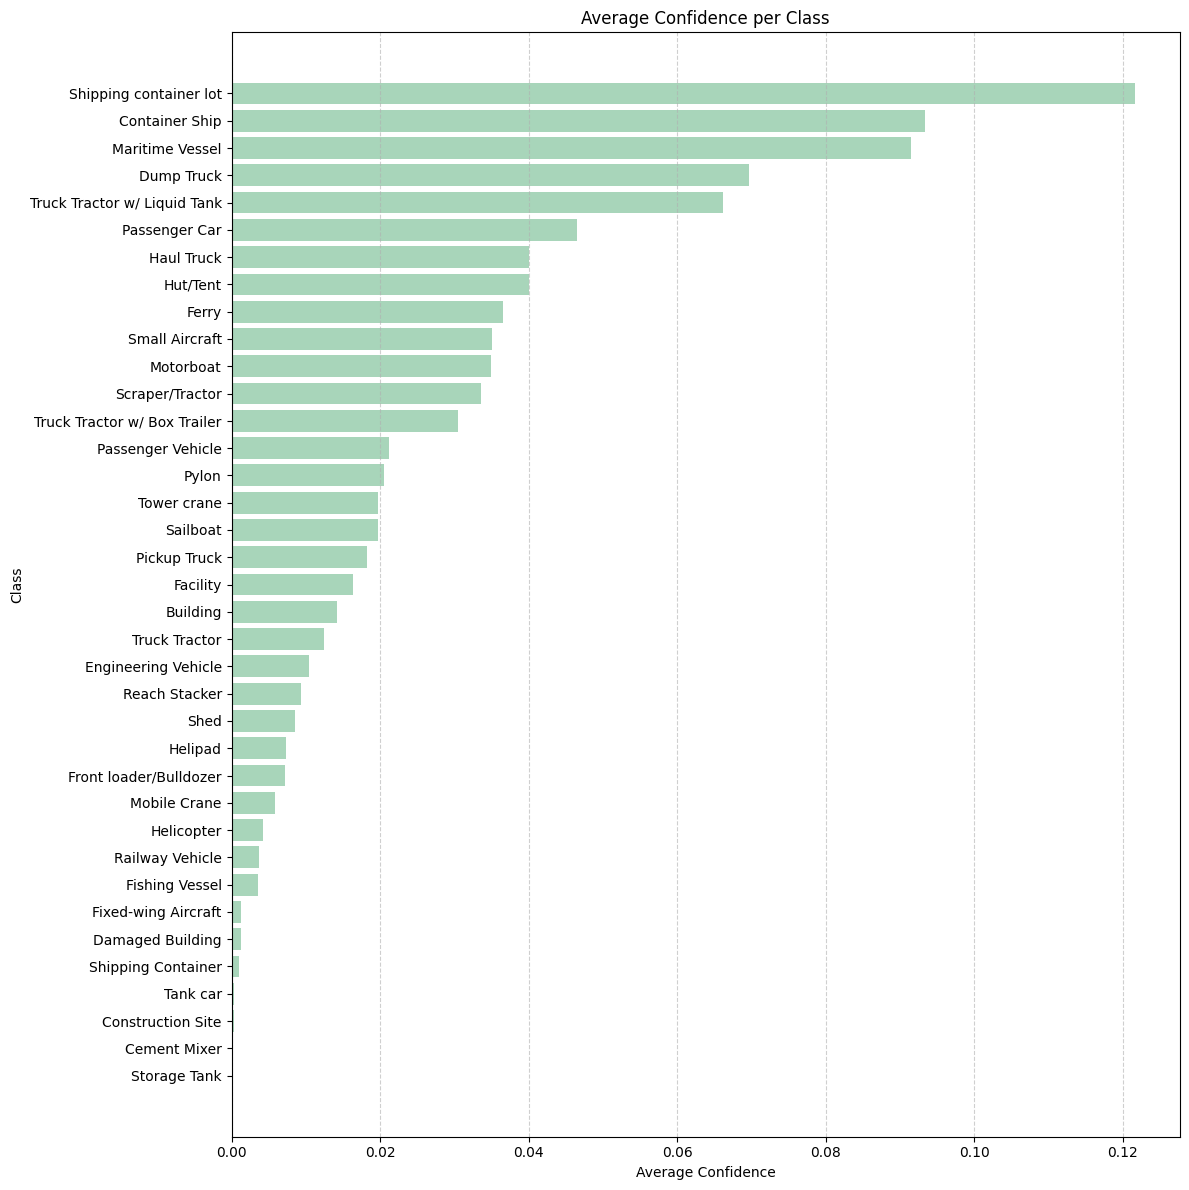

In [ ]:
# Plot
plt.figure(figsize=(12,12))
plt.barh(y_pos, sorted_conf["confidence"], color='#A8D5BA')  # soft green
plt.yticks(y_pos, sorted_conf["Class"])
plt.xlabel("Average Confidence")
plt.ylabel("Class")
plt.title("Average Confidence per Class")
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
